In [1]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.getcwd())

sys.path.append(str(curr_dir.parent.parent.absolute()))

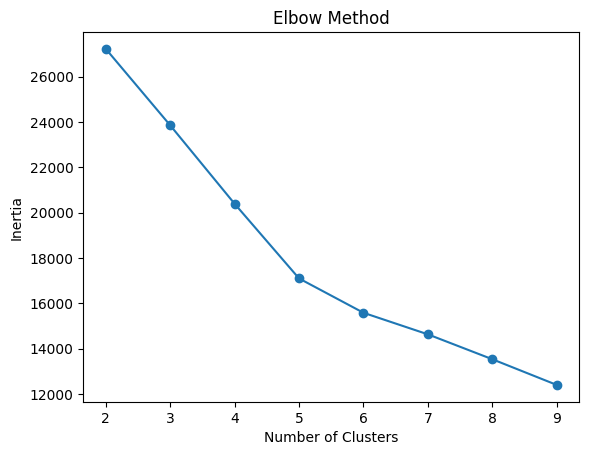

Silhouette Score: 0.3118263247006087


/tmp/ipykernel_14039/3057494313.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)


In [2]:
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

from stocks.resource import camel_to_snake, StocksDataAPI


df = StocksDataAPI().stock_info



# Select relevant features for clustering
features = list(
    map(
        camel_to_snake,
        [
            "marketCap",
            "enterpriseValue",
            "totalRevenue",
            "ebitda",
            "freeCashflow",
            "priceToBook",
            "priceToSalesTrailing12Months",
            "enterpriseToRevenue",
            "enterpriseToEbitda",
            "trailingPE",
            "profitMargins",
            "grossMargins",
            "ebitdaMargins",
            "operatingMargins",
            "earningsGrowth",
            "revenueGrowth",
            "earningsQuarterlyGrowth",
            "netIncomeToCommon",
            "trailingEps",
            "debtToEquity",
            "quickRatio",
            "currentRatio",
            "returnOnAssets",
            "returnOnEquity",
            "beta",
            "fiftyTwoWeekLow",
            "fiftyTwoWeekHigh",
            "fiftyDayAverage",
            "twoHundredDayAverage",
        ],
    )
)

# Filter out stocks with missing values in the selected features
df_filtered = df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered[features])

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


# Plot the elbow curve
plt.plot(range(2, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the elbow method, choose an optimal number of clusters
optimal_clusters = 7  # choice based on elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)

# Calculate silhouette score to evaluate clustering quality
sil_score = silhouette_score(scaled_df, df_filtered["Cluster"])
print(f"Silhouette Score: {sil_score}")

In [3]:
df_filtered

,Unnamed: 0,symbol,name_of_company,series,date_of_listing,isin_number,industry_key,sector_key,macro,basic_industry,...,gross_margins,ebitda_margins,operating_margins,return_on_assets,return_on_equity,long_business_summary,beta,recommendation_key,market_cap_rank,Cluster
0,0,NITINSPIN,Nitin Spinners Limited,EQ,02-FEB-2006,INE229H01012,textile-manufacturing,consumer-cyclical,Consumer Discretionary,Other Textile Products,...,0.25400,0.12977,0.09990,0.06550,0.120920,Nitin Spinners Limited manufactures and sells ...,0.601,buy,942.0,6
5,5,KANSAINER,Kansai Nerolac Paints Limited,EQ,15-SEP-2003,INE531A01024,specialty-chemicals,basic-materials,Consumer Discretionary,Paints,...,0.35098,0.12686,0.07407,0.07631,0.231490,Kansai Nerolac Paints Limited manufactures and...,0.320,none,308.0,6
6,6,TATAPOWER,Tata Power Company Limited,EQ,03-APR-1996,INE245A01021,utilities-independent-power-producers,utilities,Utilities,Integrated Power Utilities,...,0.30430,0.17252,0.08509,0.03292,0.114920,The Tata Power Company Limited engages in the ...,0.820,none,66.0,6
7,7,WANBURY,Wanbury Limited,EQ,29-JAN-2007,INE107F01022,drug-manufacturers-specialty-generic,healthcare,Healthcare,Pharmaceuticals,...,0.47428,0.12161,0.10677,0.11001,5.136599,Wanbury Limited manufactures and sells formula...,0.494,none,1382.0,4
9,9,TITAGARH,TITAGARH RAIL SYSTEMS LIMITED,EQ,21-APR-2008,INE615H01020,railroads,industrials,Industrials,Railway Wagons,...,0.22454,0.11728,0.10745,0.09695,0.180580,Titagarh Rail Systems Limited manufactures and...,1.343,none,309.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,1966,KEC,KEC International Limited,EQ,10-MAR-2006,INE389H01022,other_industry,other_sector,Industrials,Civil Construction,...,0.21740,0.06099,0.05511,0.03412,0.088160,"KEC International Limited, together with its s...",0.669,hold,299.0,6
1970,1970,MANINFRA,Man Infraconstruction Limited,EQ,11-MAR-2010,INE949H01023,other_industry,other_sector,Industrials,Civil Construction,...,0.47427,0.25832,0.15826,0.10050,0.227920,Man Infraconstruction Limited provides civil c...,0.616,buy,601.0,6
1971,1971,PARACABLES,Paramount Communications Limited,BE,03-JAN-2007,INE074B01023,other_industry,other_sector,Industrials,Cables - Electricals,...,0.26128,0.08341,0.08445,0.07509,0.185910,"Paramount Communications Limited, together wit...",-0.015,none,994.0,6
1972,1972,RKFORGE,Ramkrishna Forgings Limited,EQ,05-MAY-2004,INE399G01023,other_industry,other_sector,Consumer Discretionary,Auto Components & Equipments,...,0.43316,0.21241,0.14226,0.08055,0.170470,Ramkrishna Forgings Limited manufactures and s...,0.948,hold,394.0,6


In [4]:
df_filtered.groupby("Cluster").size()

Cluster
0    194
1      1
2      1
3      2
4      7
5     14
6    778
dtype: int64

In [5]:
# Analyze the characteristics of each cluster
cluster_summary = df_filtered.groupby("Cluster").describe().transpose()
cluster_summary

Cluster                          0       1      2            3            4  \
Unnamed: 0      count   194.000000     1.0    1.0     2.000000     7.000000   
                mean   1036.469072  1869.0  187.0  1395.500000   909.714286   
                std     572.891477     NaN    NaN   258.093975   591.255082   
                min      14.000000  1869.0  187.0  1213.000000     7.000000   
                25%     529.500000  1869.0  187.0  1304.250000   587.000000   
...                            ...     ...    ...          ...          ...   
market_cap_rank min      17.000000   526.0  168.0     7.000000    99.000000   
                25%     196.250000   526.0  168.0     8.250000   130.000000   
                50%     436.000000   526.0  168.0     9.500000   185.000000   
                75%     841.000000   526.0  168.0    10.750000   196.500000   
                max    1770.000000   526.0  168.0    12.000000  1382.000000   

Cluster                          5            6  
Unnamed: 0      count    14.000000   778.000000  
                mean   1039.000000  1007.956298  
                std     590.089954   566.230343  
                min     160.000000     0.000000  
                25%     591.250000   538.500000  
...                            ...          ...  
market_cap_rank min       2.000000    22.000000  
                25%      11.750000   536.500000  
                50%      18.500000   961.000000  
                75%      28.500000  1372.750000  
                max     129.000000  1957.000000  

[544 rows x 7 columns]

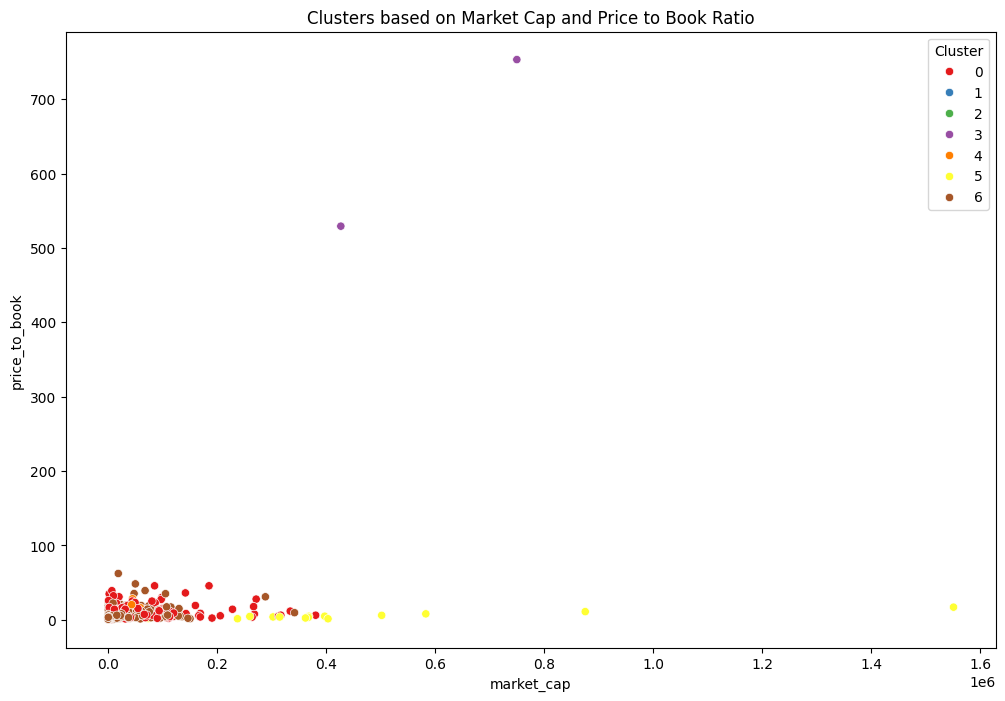

In [6]:
# Example visualization of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="market_cap", y="price_to_book", hue="Cluster", data=df_filtered, palette="Set1"
)
plt.title("Clusters based on Market Cap and Price to Book Ratio")
plt.show()